In [1]:
# This code is used to parse the given data and give a first analysis of the code (Word frequencies, Vocabulary, Lengths of messages, Output analysis...)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn as sk
import re
import string
# We will firstly get the train data 
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
samples_nb = train['toxic'].size

In [2]:
# We have a first look on a few examples
train.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
# We have a first look on a few examples
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
# we store for later use the output
rating_columns = ['id','toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
output = train[rating_columns]
output.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,0,0,0,0,0,0
1,000103f0d9cfb60f,0,0,0,0,0,0
2,000113f07ec002fd,0,0,0,0,0,0
3,0001b41b1c6bb37e,0,0,0,0,0,0
4,0001d958c54c6e35,0,0,0,0,0,0
5,00025465d4725e87,0,0,0,0,0,0
6,0002bcb3da6cb337,1,1,1,0,1,0
7,00031b1e95af7921,0,0,0,0,0,0
8,00037261f536c51d,0,0,0,0,0,0
9,00040093b2687caa,0,0,0,0,0,0


In [5]:
#We store the inputs
inputs = train[['id','comment_text']]
inputs.head()

,id,comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember..."


In [6]:
# Let's see how the outputs are distributed
output.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that 9.5 % of the given comments are toxic, 5% are obscene or/and insults, 
around 1% are either severe_toxic or identity_hate, and 0.3% are threats (from the mean column).
So quite few data are actually categorised.
We will be looking at a few samples in details

In [7]:
#Check that we don't have holes in the datas
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
id               159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


We see that all the data is non-null so we don't have to worry about filling missing data

In [8]:
#Non-Toxic comment
print(inputs.loc[150,'comment_text'])
print("-----")
#Toxic comment
print(inputs.loc[42,'comment_text'])
print("-----")
inputs.loc[42,'comment_text']

"

 Socialistm? 

There are two important features of Smith's concept of the ""invisible hand"". First, Smith was not advocating a social policy (that people should act in their own self interest), but rather was describing an observed economic reality (that people do act in their own interest). Second, Smith was not claiming that all self-interest has beneficial effects on the community. He did not argue that self-interest is always good; he merely argued against the view that self-interest is necessarily bad. It is worth noting that, upon his death, Smith left much of his personal wealth to charity.

Good!  Let's all make sure we put forth the idea that Adam Smith was a socialist.  That's the wikipedia way!"
-----
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head ba

"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!"

We can see that we have some cleaning to do before being able to efficiently use words features/embeddings
Some characters such as "..." "!" "?" could give us hints about intensity level in the message so i intend to use them
However we will be removing jumps as /n.
A first clue here might be the insults. Those ones should be easy to detect thanks to a vocabulary or an embedding. We can already imagine that we could have a toxicity rating per word which should help us to give a good general categorization. UpperCase and punctuation can also be features for our model. 

In [9]:
# Before any feature extraction we are going to do some cleaning while keeping some usable features

# Counting chars
inputs.loc[:,'nb_char'] = inputs['comment_text'].map(lambda x:len(x))

# nb of words
inputs.loc[:,'nb_word'] = inputs['comment_text'].map(lambda x:len(re.findall(r'\w+', x)))

# Counting % of UpperCase
inputs.loc[:,'per_upper_case'] = inputs['comment_text'].map(lambda x:sum(1 for c in x if c.isupper())/len(x))

# Counting punctuations such as . ! ; , ? ) or (
inputs.loc[:,'dot'] = inputs['comment_text'].map(lambda x:x.count('.')/len(x))
inputs.loc[:,'exclamation'] = inputs['comment_text'].map(lambda x:x.count('!')/len(x))
inputs.loc[:,'semi-colon'] = inputs['comment_text'].map(lambda x:x.count(';')/len(x))
inputs.loc[:,'comma'] = inputs['comment_text'].map(lambda x:x.count(',')/len(x))
inputs.loc[:,'question'] = inputs['comment_text'].map(lambda x:x.count('?')/len(x))
inputs.loc[:,'double_dot'] = inputs['comment_text'].map(lambda x:x.count(':')/len(x))
inputs.loc[:,'parenthesis'] = inputs['comment_text'].map(lambda x:(x.count(')')+x.count('('))/len(x))
inputs.loc[:,'hooks'] = inputs['comment_text'].map(lambda x:(x.count(']')+x.count('['))/len(x))

extra_features_list=['nb_char','nb_word','dot','exclamation','semi-colon','comma','question','double_dot','parenthesis','hooks']
# Cleaning special characters, lowering cases, punctuation and stopwords are dealt with sklearn
# We are left with some lemmatization to deal with


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
# We can compare our new features for toxic and non toxic comments
inputs.loc[train['toxic']==1].describe()

,nb_char,nb_word,per_upper_case,dot,exclamation,semi-colon,comma,question,double_dot,parenthesis,hooks
count,15294.000000,15294.000000,15294.000000,15294.000000,15294.000000,15294.000000,15294.000000,15294.000000,15294.000000,15294.000000,15294.000000
mean,295.246044,53.306133,0.114575,0.016111,0.009258,0.000139,0.006225,0.002908,0.000727,0.001212,0.000158
std,617.379025,110.144107,0.211694,0.022851,0.040792,0.001617,0.009069,0.011741,0.003662,0.005535,0.002803
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,11.000000,0.019376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,123.000000,23.000000,0.035088,0.011070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,271.000000,50.000000,0.069964,0.021071,0.002021,0.000000,0.010097,0.000000,0.000000,0.000000,0.000000
max,5000.000000,1403.000000,0.998189,0.590909,0.994366,0.102362,0.142576,0.556818,0.100000,0.162162,0.202247


In [11]:
inputs.loc[train['toxic']==0].describe()

,nb_char,nb_word,per_upper_case,dot,exclamation,semi-colon,comma,question,double_dot,parenthesis,hooks
count,144277.000000,144277.000000,144277.000000,144277.000000,144277.000000,144277.000000,144277.000000,144277.000000,144277.000000,144277.000000,144277.000000
mean,404.549339,70.859174,0.044949,0.013565,0.001553,0.000290,0.007211,0.002047,0.002070,0.003631,0.000414
std,586.850889,101.175399,0.065708,0.015078,0.012004,0.001769,0.007863,0.007693,0.005939,0.009557,0.004370
min,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102.000000,18.000000,0.020833,0.006494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,216.000000,39.000000,0.031549,0.010471,0.000000,0.000000,0.006173,0.000000,0.000000,0.000000,0.000000
75%,453.000000,80.000000,0.047619,0.016333,0.000000,0.000000,0.010638,0.000459,0.001359,0.003526,0.000000
max,5000.000000,1250.000000,0.962963,0.873874,0.917197,0.129353,0.268657,0.598131,0.394737,0.318777,0.194444


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5B37B37B8>,
      dtype=object)

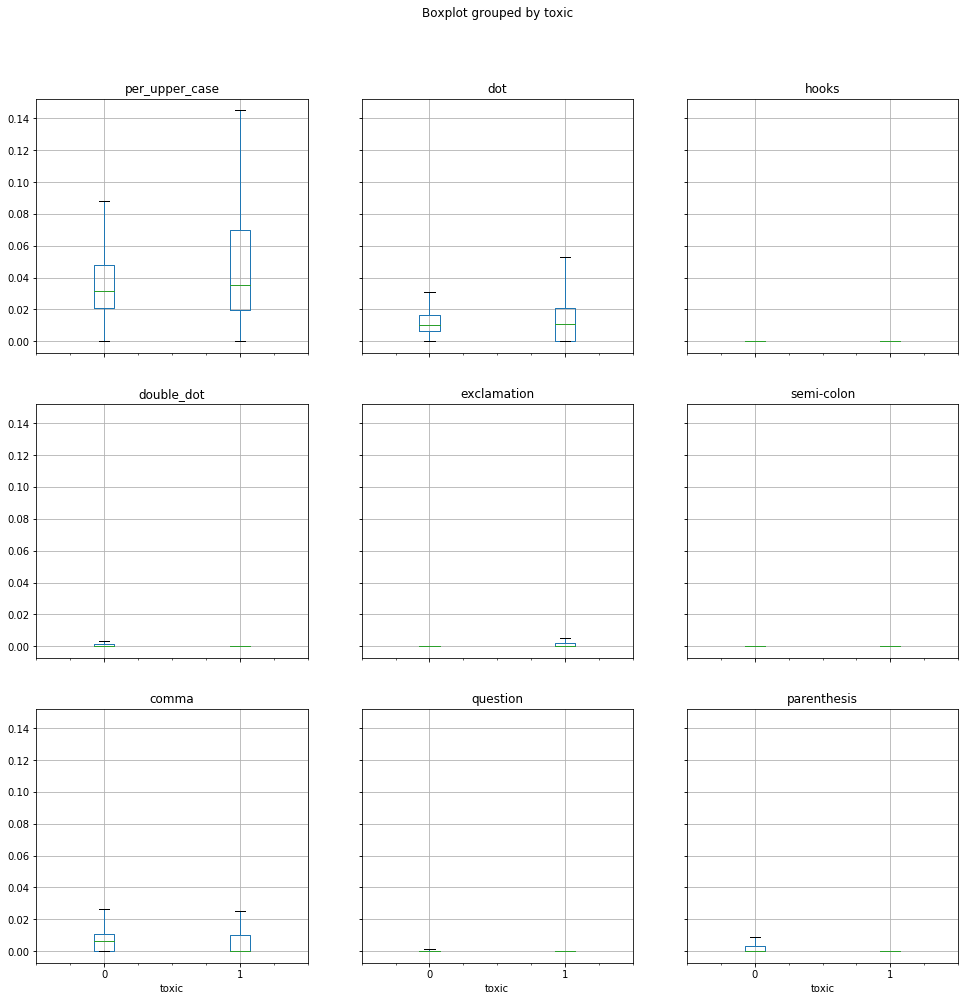

In [12]:
#Let's take a look at the boxplot representation with the simples features we gathered for the toxic category comparison
dfBPl = pd.concat([inputs,train[rating_columns[1]]],axis=1)
dfBPl.boxplot(showfliers=False,by='toxic',column=['per_upper_case','dot','hooks','double_dot','exclamation','semi-colon','comma','question','parenthesis'],figsize=[16,16])


With a first look it seems that some of our features might be usable even if not strongly separated

In [13]:
#Now we need to create the features from the comments

# Bags of words/ Occurences (mono and bi-grams)
from sklearn.feature_extraction.text import *
count_vect = CountVectorizer(ngram_range=(1, 2))
count_train = count_vect.fit_transform(inputs['comment_text'])

# tf-idf
tfidf_transformer = TfidfTransformer()
tfidf_train = tfidf_transformer.fit_transform(count_train)

In [14]:
#We are going to do the same from the chars

# Bags of words
count_char_vect = CountVectorizer(analyzer='char',ngram_range=(1, 2))
count_char_train = count_char_vect.fit_transform(inputs['comment_text'])

#tf-idf
tfidf_char_transformer = TfidfTransformer()
tfidf_char_train = tfidf_transformer.fit_transform(count_char_train)

In [15]:
tfidf_train.shape

(159571, 2467140)

In [16]:
indices_nt = np.where(output['toxic']==0)[0]
indices_t = np.where(output['toxic']==1)[0]
# Let's get the counts of words for toxic and non toxic comments
ntoxic = count_train[indices_nt,:].sum(axis=0)
toxic = count_train[indices_t,:].sum(axis=0)

# Let's get the counts of char for toxic and non toxic comments
ntoxic_char = count_char_train[indices_nt,:].sum(axis=0)
toxic_char = count_char_train[indices_t,:].sum(axis=0)


In [17]:
#Take a quick look at word/char most used for toxic
#Words
df_nt = pd.DataFrame(ntoxic.transpose(),count_vect.get_feature_names()).sort_values(by=0,ascending=False)[0:20]
df_t = pd.DataFrame(toxic.transpose(),count_vect.get_feature_names()).sort_values(by=0,ascending=False)[0:20]

#Chars
df_nt_c = pd.DataFrame(ntoxic_char.transpose(),count_char_vect.get_feature_names()).sort_values(by=0,ascending=False)[0:20]
df_t_c = pd.DataFrame(toxic_char.transpose(),count_char_vect.get_feature_names()).sort_values(by=0,ascending=False)[0:20]

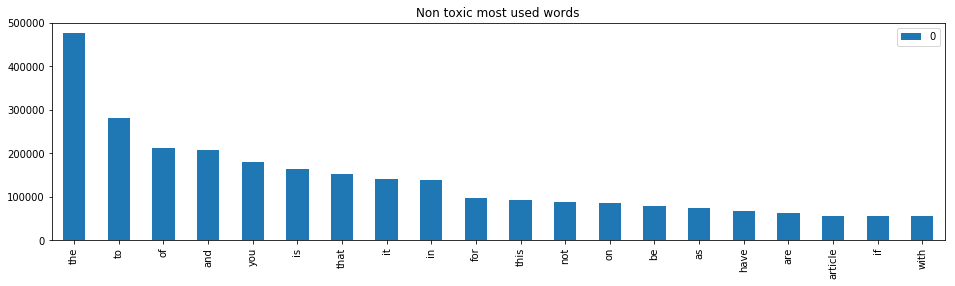

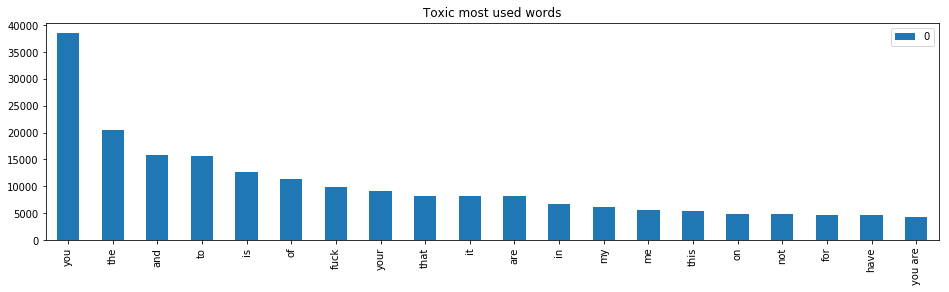

In [26]:
# Words
df_nt.plot(kind='bar',figsize=[16,4],title="Non toxic most used words")
df_t.plot(kind='bar',figsize=[16,4], title="Toxic most used words")

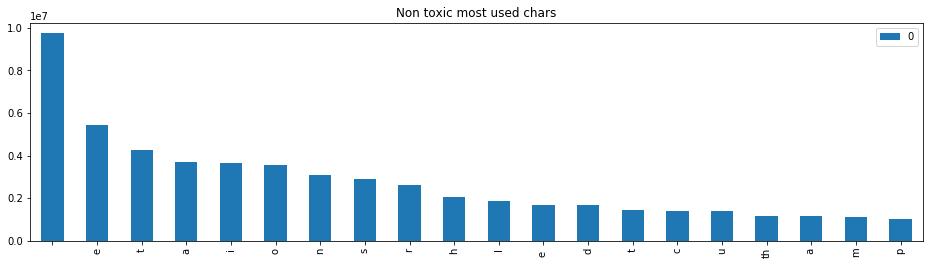

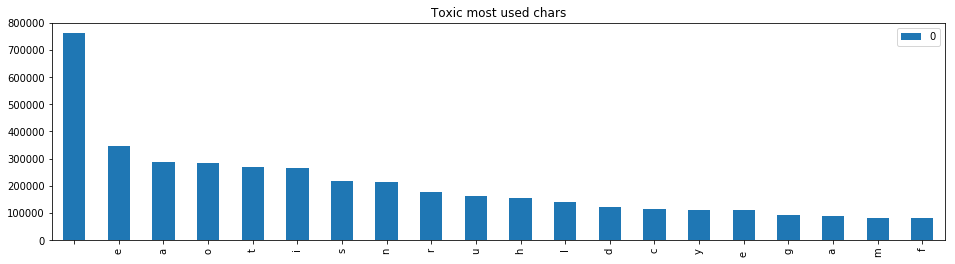

In [28]:
# Chars
df_nt_c.plot(kind='bar',figsize=[16,4],title="Non toxic most used chars")
df_t_c.plot(kind='bar',figsize=[16,4], title="Toxic most used chars")

In [ ]:
# We can use SVD (/LSA) to visualize if the toxicity is well separated with tfidf for words or chars
from sklearn import decomposition
from sklearn.pipeline import make_pipeline
SVD = decomposition.TruncatedSVD(n_components=3)
normalizer = sk.preprocessing.Normalizer(copy=False)
lsa = make_pipeline(SVD, normalizer)
result = lsa.fit_transform(tfidf_train)
result_char = lsa.fit_transform(tfidf_char_train)

#We will use PCA for our features 
PCA = decomposition.PCA(n_components=3)
normalizer = sk.preprocessing.Normalizer(copy=False)
pcaPipe = make_pipeline(PCA, normalizer)
resultFeatures = pcaPipe.fit_transform(inputs[extra_features_list])

In [ ]:
# Visualisation of LSA for words
print(SVD.explained_variance_ratio_)
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111)
colors = ['blue','red']
for i in range(1,samples_nb):
    ax.scatter(result[i,0],result[i,1], color= colors[int(train['toxic'][i])],marker=0)
plt.xlabel('LSA1')
plt.ylabel('LSA2')
plt.show()

[0.07799662 0.02499246 0.02357884]


KeyboardInterrupt: 

In [ ]:
# Visualization of LSA for chars
print(SVD.explained_variance_ratio_)
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111,projection='3d')
colors = ['blue','red']
for i in range(5000,10000):
    ax.scatter(result_char[i,0],result_char[i,1],result_char[i,2], color= colors[int(train['toxic'][i])],marker=0)
plt.xlabel('LSA1')
plt.ylabel('LSA2')
plt.show()

In [ ]:
#PCA for our features
print(PCA.explained_variance_ratio_)
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111,projection='3d')
colors = ['blue','red']
for i in range(5000,10000):
    ax.scatter(resultFeatures[i,0],resultFeatures[i,1],resultFeatures[i,2], color= colors[int(train['toxic'][i])],marker=3)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [36]:
# Now we are going to use our features to try some classifications methods to predict score upon our features

# We will be first using LogisticRegression as we are here trying to predict classes, sklearn implementation will be used
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from scipy.sparse import hstack
xTrain = hstack([tfidf_train,tfidf_char_train])
xTrain = hstack([xTrain,inputs[extra_features_list]])

logreg = LogisticRegression(C=10)

In [37]:
logreg.fit(xTrain,output['toxic'])

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
#Debug Cells
predictionTrain = logreg.predict_proba(xTrain)
np.sum((predictionTrain[:,1]-train['toxic']))

-33.007390069241275

In [45]:
predictionTrain[159546,1]

0.9459727496625419

In [46]:
xTrain.shape

(159571, 2485469)